1. Inductive reasoning is a type of method used to draw conclusions. Generally, it goes from specific conclusions to general information. An example of inductive reasoning would be if someone saw a friend's cat purring, then notice that every cat that they've met purrs, then the general conclusion is that all cats purr. On the other hand, deductive reasoning is a type of method used to draw conclusions by starting with a general idea and ending with more specific conclusions. An example of deductive reasoning would be a theory like all insects have six legs, however, spiders have eight legs. Therefore, the conclusion would be spiders would not be considered to be insects as they have eight legs.

In [94]:
import pandas as pd

In [95]:
heart_df = pd.read_csv('processed.switzerland.data')
heart_df.head()

,32,1,1.1,95,0,?,0.1,127,0.2,.7,1.2,?.1,?.2,1.3
0,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
1,35,1,4,?,0,?,0,130,1,?,?,?,7,3
2,36,1,4,110,0,?,0,125,1,1,2,?,6,1
3,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2
4,38,0,4,110,0,0,0,156,0,0,2,?,3,1


In [96]:
#2

heart_df.columns = heart_df.columns.str.replace('32','Age')
heart_df.columns = heart_df.columns.str.replace('1', 'Sex')
heart_df.columns = heart_df.columns.str.replace('.', ' ')
heart_df.columns = heart_df.columns.str.replace('Sex Sex', 'Chest_Pain_Type')
heart_df.columns = heart_df.columns.str.replace('95', 'RBP')
heart_df.columns = heart_df.columns.str.replace('0', 'Cholestoral')
heart_df.columns = heart_df.columns.str.replace('?', 'FBS')
heart_df.columns = heart_df.columns.str.replace('Cholestoral Sex', 'RECG')
heart_df.columns = heart_df.columns.str.replace('Sex27', 'MHR')
heart_df.columns = heart_df.columns.str.replace('Cholestoral 2', 'EIA')
heart_df.columns = heart_df.columns.str.replace('7', 'Old')
heart_df.columns = heart_df.columns.str.replace('Sex 2', 'Slope')
heart_df.columns = heart_df.columns.str.replace('FBS Sex', 'Vessels')
heart_df.columns = heart_df.columns.str.replace('FBS 2', 'THAL')
heart_df.columns = heart_df.columns.str.replace('Sex 3', 'Outcome')

/tmp/ipykernel_1872/1487158329.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  heart_df.columns = heart_df.columns.str.replace('.', ' ')
/tmp/ipykernel_1872/1487158329.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  heart_df.columns = heart_df.columns.str.replace('?', 'FBS')


In [97]:
heart_df.drop('Cholestoral', axis=1)

,Age,Sex,Chest_Pain_Type,RBP,FBS,RECG,MHR,EIA,Old,Slope,Vessels,THAL,Outcome
0,34,1,4,115,?,?,154,0,.2,1,?,?,1
1,35,1,4,?,?,0,130,1,?,?,?,7,3
2,36,1,4,110,?,0,125,1,1,2,?,6,1
3,38,0,4,105,?,0,166,0,2.8,1,?,?,2
4,38,0,4,110,0,0,156,0,0,2,?,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,70,1,4,115,0,1,92,1,0,2,?,7,1
118,70,1,4,140,1,0,157,1,2,2,?,7,3
119,72,1,3,160,?,2,114,0,1.6,2,2,?,0
120,73,0,3,160,0,1,121,0,0,1,?,3,1


In [98]:
heart_df.replace('?', '00', inplace=True)
heart_df.head()

,Age,Sex,Chest_Pain_Type,RBP,Cholestoral,FBS,RECG,MHR,EIA,Old,Slope,Vessels,THAL,Outcome
0,34,1,4,115,0,00,00,154,0,.2,1,00,00,1
1,35,1,4,00,0,00,0,130,1,00,00,00,7,3
2,36,1,4,110,0,00,0,125,1,1,2,00,6,1
3,38,0,4,105,0,00,0,166,0,2.8,1,00,00,2
4,38,0,4,110,0,0,0,156,0,0,2,00,3,1


In [99]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [100]:
X = heart_df.drop('Cholestoral', axis=1)
y = heart_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3, 
                                                   random_state=32)

In [142]:
# 3

from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 7, random_state=32)

In [143]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

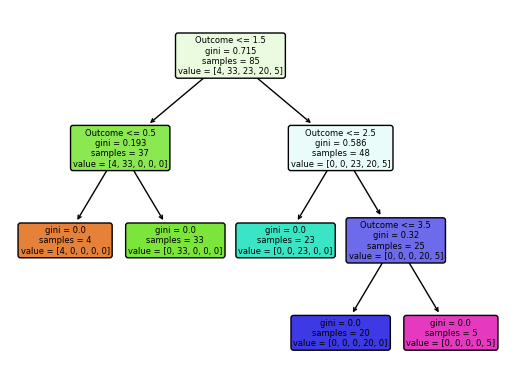

<Figure size 640x480 with 0 Axes>

In [144]:
import matplotlib.pyplot as plt
tree.plot_tree(model, feature_names = list(X.columns),
               filled=True, fontsize=6, rounded=True)

plt.show()
plt.savefig("hearttree.svg")

I tuned the figure by changing the max_depth which determined how long the tree went.

In [126]:
# 4

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=32)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8918918918918919

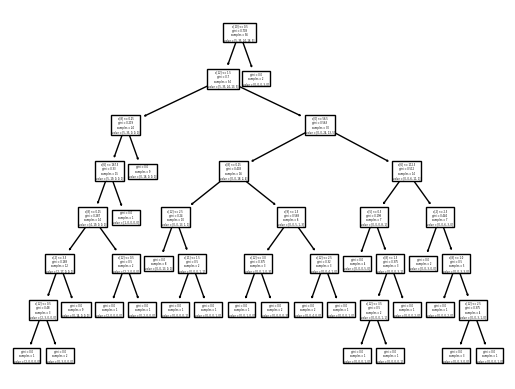

In [129]:
import matplotlib.pyplot as plt
tree_5 = rf.estimators_[6]
tree.plot_tree(tree_5)
plt.savefig("hearttree_rf.png")

I tuned the model by changing the rf.estimators from 4 to 6.

In [108]:
# 5

heart_df.drop(['RBP', 'FBS', 'RECG', 'MHR', 'EIA', 'Slope', 'Vessels', 'THAL'], axis=1)

,Age,Sex,Chest_Pain_Type,Cholestoral,Old,Outcome
0,34,1,4,0,.2,1
1,35,1,4,0,00,3
2,36,1,4,0,1,1
3,38,0,4,0,2.8,2
4,38,0,4,0,0,1
...,...,...,...,...,...,...
117,70,1,4,0,0,1
118,70,1,4,0,2,3
119,72,1,3,0,1.6,0
120,73,0,3,0,0,1


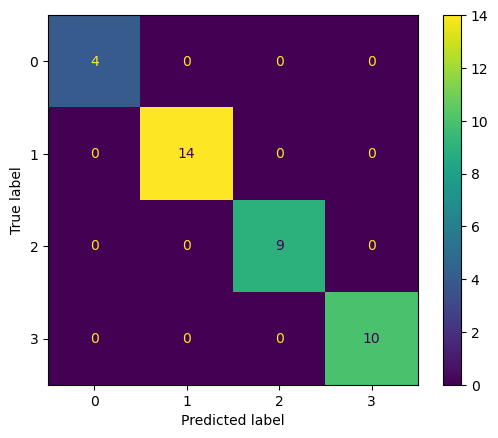

In [116]:
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier
xgb = XGBClassifier

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

I tuned this model by dropping columns that were classified as objects as they wouldn't allow for a proper model.